<a href="https://colab.research.google.com/github/bariaakash/Gender-Classification-Model/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN model gender classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/archive.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pathlib
import numpy
import matplotlib.pyplot as plt


In [ ]:
data_dir=pathlib.Path('/content/Training')

In [ ]:
class_names = numpy.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['female' 'male']


In [ ]:
from matplotlib import image as mpimg

(-0.5, 79.5, 99.5, -0.5)

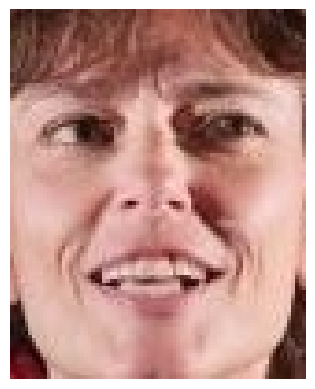

In [ ]:
image = mpimg.imread("/content/Training/female/131425.jpg.jpg")
plt.imshow(image)
plt.axis(False)

In [ ]:
image.shape

(100, 80, 3)

array([[[ 84,  50,  48],
        [ 77,  43,  41],
        [ 58,  24,  22],
        ...,
        [ 49,  26,  20],
        [ 64,  39,  32],
        [106,  81,  74]],

       [[ 75,  41,  39],
        [ 58,  25,  20],
        [ 47,  13,  11],
        ...,
        [ 39,  16,  10],
        [ 51,  26,  19],
        [ 81,  56,  49]],

       [[ 65,  34,  29],
        [ 62,  32,  24],
        [ 53,  22,  17],
        ...,
        [ 32,   9,   3],
        [ 36,  11,   4],
        [ 46,  21,  14]],

       ...,

       [[101,   8,  19],
        [100,   7,  18],
        [106,  14,  25],
        ...,
        [ 87,  50,  42],
        [ 88,  49,  44],
        [ 85,  46,  41]],

       [[119,  18,  32],
        [107,   9,  22],
        [104,   8,  20],
        ...,
        [ 89,  52,  44],
        [ 92,  53,  48],
        [ 87,  48,  43]],

       [[141,  39,  53],
        [119,  18,  32],
        [105,   4,  18],
        ...,
        [ 91,  54,  46],
        [ 95,  56,  51],
        [ 88,  49,  44]]], dtype=uint8)
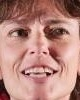

In [ ]:
image

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/Training"

In [ ]:
test_dir = "/content/Validation"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# turning data into patches

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               seed = 42)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary',
                                             seed = 42)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [ ]:
# building cnn

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 10,kernel_size = 3,activation = "relu",input_shape = (224,224,3)),
        tf.keras.layers.Conv2D(10,3, activation = "relu"),
        tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),

        tf.keras.layers.Conv2D(10,3,activation ='relu'),
        tf.keras.layers.Conv2D(10,3,activation ='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation ="sigmoid")])


model.compile(loss = "binary_crossentropy",
              optimizer = 'Adam',
              metrics = ["accuracy"])

model.fit(train_data,epochs = 5
          )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1470/1470 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.7940 - loss: 0.4303
Epoch 2/5
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - accuracy: 0.9186 - loss: 0.2151
Epoch 3/5
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9275 - loss: 0.1887
Epoch 4/5
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.9389 - loss: 0.1635
Epoch 5/5
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 86s 43ms/step - accuracy: 0.9473 - loss: 0.1410


In [ ]:
model.evaluate(test_data)

365/365 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9363 - loss: 0.1748


[0.17097258567810059, 0.9357884526252747]

In [ ]:
def load_and_prep(filename,img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img,size = [img_shape,img_shape])
  #rescale the image
  img = img/255.
  return img

In [ ]:
#creating the function to vialize and get teh output with the class namd

In [ ]:
def pre_and_plot(model,filename,class_names = class_names):
  img = load_and_prep(filename)
  #prediction
  pred = model.predict(tf.expand_dims(img,axis = 0))
  #class name
  pred_class = class_names[int(tf.round(pred))]
  #plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
[[0.9960447]]


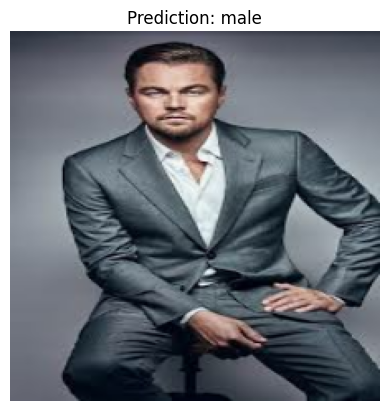

In [ ]:
pre_and_plot(model,"/content/drive/MyDrive/Colab Notebooks/gender recognition/mm2.jfif")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.9472303]]


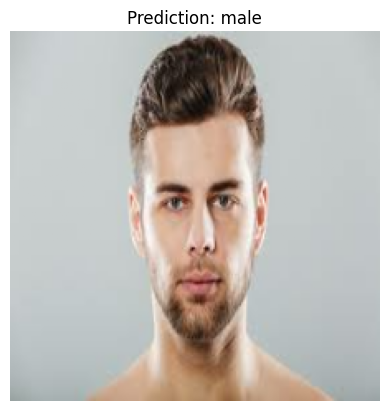

In [ ]:
pre_and_plot(model,"/content/drive/MyDrive/Colab Notebooks/gender recognition/mm1.jfif")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.01020316]]


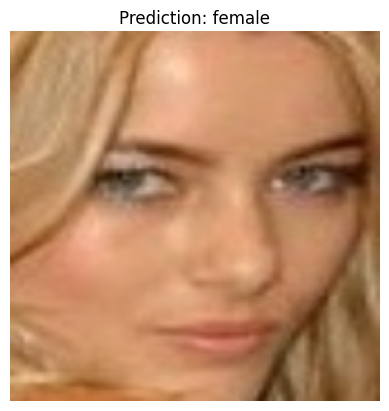

In [ ]:
pre_and_plot(model,"/content/Training/female/131429.jpg.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.00020422]]


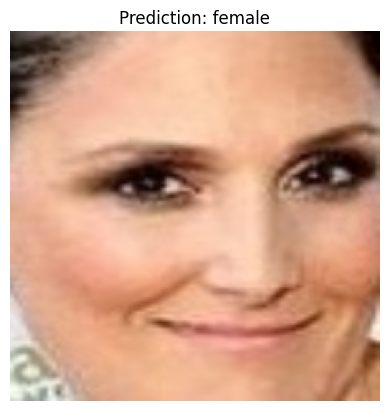

In [ ]:
pre_and_plot(model,"/content/Training/female/131468.jpg.jpg")